MACHINE LEARNING 
CREAR MODELO PARA PREDECIR LA CARGA DE CONTAMINACION DE C02 QUE EMITE GUATEMALA

UNIVERSIDAD RAFAEL LANDIVAR - INTERCICLO 2022 - TEORIA DE SISTEMAS

JULIO ANTHONY ENGELS RUIZ COTO - 1284719

EDDIE ALEJANDRO GIRÓN CARRANZA - 1307419


In [1]:
#La informacion fue recabada de la pagina: https://www.greenpeace.org/mexico/blog/9386/huella-de-carbono/.
#Donde se obtuvo el datasets http://www.globalcarbonatlas.org/en/CO2-emissions , en version csv.

#Se importan librerias a utilizar para trabajar los datos del archivo csv:
#Libreria de Manipulación y análisis de datos estructurados
import pandas as pd  
#Libreria de Algebra Lineal (Vectores y Matrices)
import numpy as np
#Libreria para visualizacion de datos en Phyton
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
#Modelo estimador de aprendizaje supervisado Machine Learning Regresion Lineal
from sklearn.linear_model import LinearRegression

#Librerias de Machine Learning en Phyton https://scikit-learn.org/stable/
#Algoritmos de validacion cruzada
from sklearn.model_selection import KFold
#Funcion que permite indicar varias metricas de evaluacion
from sklearn.model_selection import cross_val_predict
#Funcion para hacer la validacion cruzada de K bolsas
from sklearn.model_selection import cross_validate

#Metricas de evaluacion del modelo de regresion Multivariable
from sklearn.metrics import make_scorer
from sklearn import linear_model, metrics
#Error Cuadrático Medio (Mean Squared Error)
from sklearn.metrics import mean_squared_error

from math import sqrt


In [2]:
#Importacion del dataset de Google driver
BASE_FOLDER = '/content/drive/My Drive/PROYECTO FINAL TEORIA DE SISTEMAS 2022/'

from google.colab import drive
drive.mount('/content/drive')

path1 = BASE_FOLDER+ "contaminacion.csv"


Mounted at /content/drive


1.PREPARACION DE DATOS

In [3]:
#Metodo para lectura de datos en Pandas 
#Conversion de CSV a DataFrame
export_df = pd.read_csv(path1)
#se visualiza el datasets
print(export_df.head(20))# ver data frame por filas_df.head(5))

    time   Afghanistan  Albania  Algeria  Andorra   Angola  Anguilla  \
0    1960      0.41388   2.0225   6.1512      NaN  0.54895       NaN   
1    1961      0.49080   2.2790   6.0559      NaN  0.45371       NaN   
2    1962      0.68859   2.4622   5.6610      NaN  1.17910       NaN   
3    1963      0.70674   2.0812   5.4192      NaN  1.14970       NaN   
4    1964      0.83855   2.0152   5.6430      NaN  1.22290       NaN   
5    1965      1.00690   2.1728   6.5885      NaN  1.18620       NaN   
6    1966      1.09120   2.5501   8.4209      NaN  1.55250       NaN   
7    1967      1.28190   2.6784   8.4316      NaN  0.99181       NaN   
8    1968      1.22340   3.0704   9.0502      NaN  1.66950       NaN   
9    1969      0.94123   3.2426  11.2630      NaN  2.78310       NaN   
10   1970      1.67040   3.7409  15.0590      NaN  3.57790       NaN   
11   1971      1.89360   4.3492  18.6495      NaN  3.40540       NaN   
12   1972      1.53030   5.6389  28.3226      NaN  4.50050      

In [4]:
#Informacion general de los datos por cada columna
export_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Columns: 222 entries, time  to Zimbabwe
dtypes: float64(221), int64(1)
memory usage: 105.9 KB


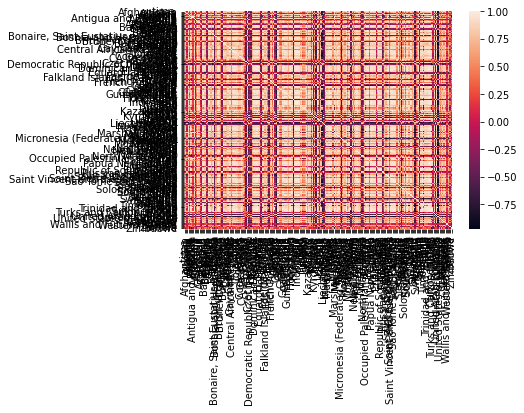

In [6]:
#Correlacion multivariable
#Diagrama de correlacion termico
corr = export_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
#entre mas claro el color tiende a mas correlacion 

In [7]:
export_df.corr().style.background_gradient(cmap=plt.get_cmap('RdYlGn'), axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [8]:
#Correlacion que existe entre la variable objetivo (guatemala) y las variables independientes este caso los demas paises
corr = export_df.corr()
corr[['Guatemala']].sort_values(by = 'Guatemala',ascending = False)\
.style.background_gradient()

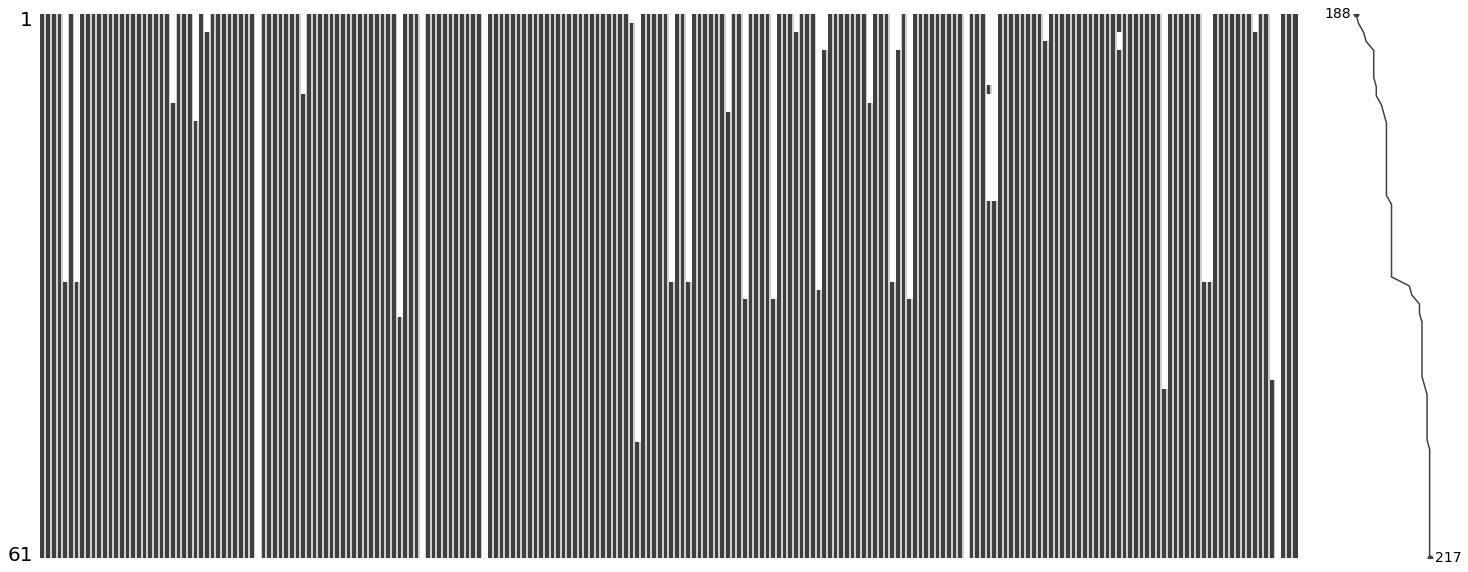

In [9]:
#Visualizacion del datasets con las columnas de datos faltantes en color blanco
msno.matrix(export_df.head(20000))

In [10]:
#Funcion para cuantificar datos Faltantes Nan.
def missing_table(data_name):
    non_null_counts = data_name.count() # cuantos valores no nulos hay en la columna
    null_counts = data_name.isnull().sum() # cuantos valores nulos hay en la columna
    total_counts = non_null_counts+null_counts # cuantos recuentos totales
    percent_missing= round(100*null_counts/total_counts,1)#el 1 = por columna
    min_non_null = data_name.min()
    median_non_null = data_name.quantile(q=0.5)# la mitad del cuartil es la media 
    max_non_null = data_name.max()
    missing_data=pd.concat([total_counts,non_null_counts,
                            null_counts,percent_missing,
                            min_non_null,median_non_null,
                            max_non_null],
                           axis=1,
                           keys=['Total Counts','Non-Null Counts',
                                 'Null Counts','Percent Missing(%)',
                                 'Non-Null Minimum','Non-Null Median',
                                 'Non-Null Maximum'])
    return missing_data

missing_list_train = export_df.columns
#axis = 1 columna
#axis = 0 fila

In [11]:
#Informacion de los datos faltantes por columna
missing_table(pd.DataFrame(export_df[missing_list_train]))

Total Counts  Non-Null Counts  Null Counts  \
time                                 61               61            0   
Afghanistan                          61               61            0   
Albania                              61               61            0   
Algeria                              61               61            0   
Andorra                              61               31           30   
...                                 ...              ...          ...   
Wallis and Futuna Islands            61               20           41   
Western Sahara                       61                0           61   
Yemen                                61               61            0   
Zambia                               61               61            0   
Zimbabwe                             61               61            0   

                           Percent Missing(%)  Non-Null Minimum  \
time                                      0.0       1960.000000   
Afghanistan                               0.0          0.413880   
Albania                                   0.0          1.531600   
Algeria                                   0.0          5.419200   
Andorra                                  49.2          0.406700   
...                                       ...               ...   
Wallis and Futuna Islands                67.2          0.014656   
Western Sahara                          100.0               NaN   
Yemen                                     0.0          1.494900   
Zambia                                    0.0          1.777600   
Zimbabwe                                  0.0          4.469100   

                           Non-Null Median  Non-Null Maximum  
time                           1990.000000       2020.000000  
Afghanistan                       1.913200         12.160300  
Albania                           4.341800          8.976800  
Algeria                          79.883300        166.641900  
Andorra                           0.490980          0.575250  
...                                    ...               ...  
Wallis and Futuna Islands         0.025648          0.029312  
Western Sahara                         NaN               NaN  
Yemen                             9.520200         24.976300  
Zambia                            3.372400          7.313100  
Zimbabwe                          9.879600         17.393600  

[222 rows x 7 columns]

In [12]:
# Luego de anlizar la tabla de valores faltantes descarto las columnas con más del 40% de datos faltantes 
thresh = len(export_df)*.60 #es 0.60 por que es el complemento de 1-0.4 =0.60
#Se eliminan las columnas con mas del 40% de datos faltantes
export_df.dropna(thresh = thresh, axis = 1, inplace = True)
print(thresh)
#axis = 1 columna
#axis = 0 fila

36.6


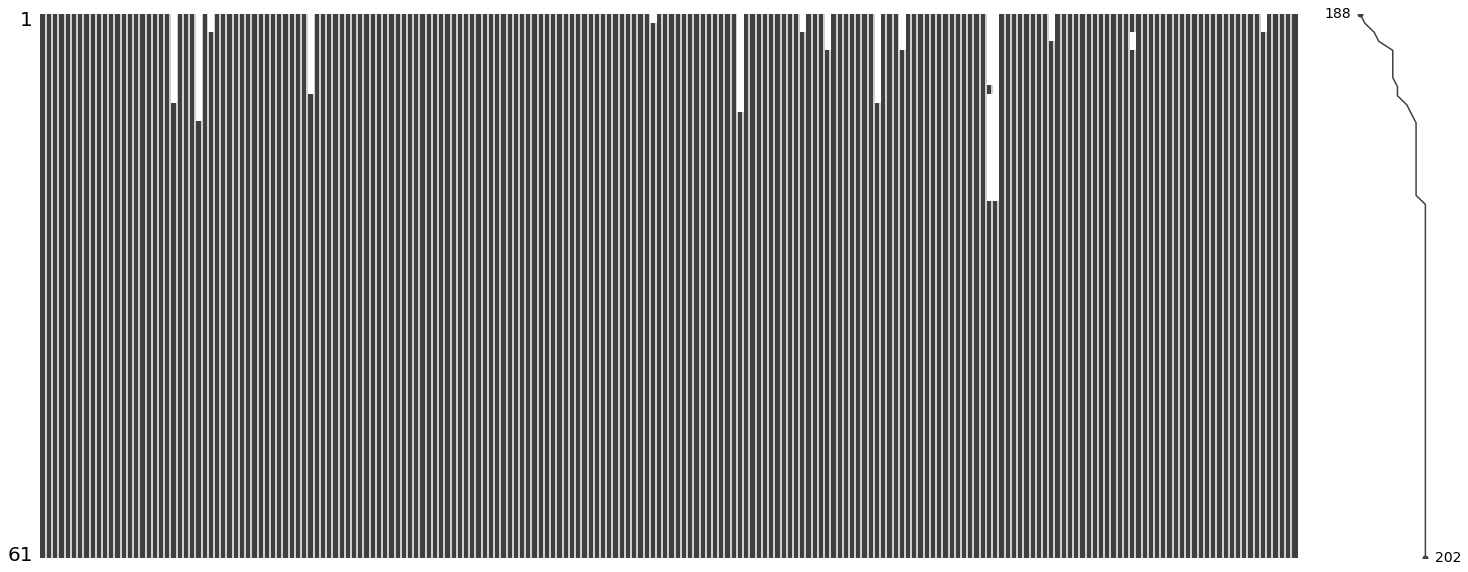

In [13]:
#Visualizacion de las columnas que tienen datos faltantes y no se eliminaron
msno.matrix(export_df.head(20000)) #20000 representa el ancho en el cual se quiere ver la matrix

In [14]:
# verificar cuales valores son NaN o nulos (Null)
export_df.isna()

time   Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  \
0   False        False    False    False   False                False   
1   False        False    False    False   False                False   
2   False        False    False    False   False                False   
3   False        False    False    False   False                False   
4   False        False    False    False   False                False   
..    ...          ...      ...      ...     ...                  ...   
56  False        False    False    False   False                False   
57  False        False    False    False   False                False   
58  False        False    False    False   False                False   
59  False        False    False    False   False                False   
60  False        False    False    False   False                False   

    Argentina  Armenia  Aruba  Australia  ...  United Kingdom  \
0       False    False  False      False  ...           False   
1       False    False  False      False  ...           False   
2       False    False  False      False  ...           False   
3       False    False  False      False  ...           False   
4       False    False  False      False  ...           False   
..        ...      ...    ...        ...  ...             ...   
56      False    False  False      False  ...           False   
57      False    False  False      False  ...           False   
58      False    False  False      False  ...           False   
59      False    False  False      False  ...           False   
60      False    False  False      False  ...           False   

    United States of America  Uruguay  Uzbekistan  Vanuatu  Venezuela  \
0                      False    False       False     True      False   
1                      False    False       False     True      False   
2                      False    False       False    False      False   
3                      False    False       False    False      False   
4                      False    False       False    False      False   
..                       ...      ...         ...      ...        ...   
56                     False    False       False    False      False   
57                     False    False       False    False      False   
58                     False    False       False    False      False   
59                     False    False       False    False      False   
60                     False    False       False    False      False   

    Vietnam  Yemen  Zambia  Zimbabwe  
0     False  False   False     False  
1     False  False   False     False  
2     False  False   False     False  
3     False  False   False     False  
4     False  False   False     False  
..      ...    ...     ...       ...  
56    False  False   False     False  
57    False  False   False     False  
58    False  False   False     False  
59    False  False   False     False  
60    False  False   False     False  

[61 rows x 202 columns]

In [15]:
#Se guarda el Data Frame sin datos faltantes, se tomar el valor promedio de cada columna
#se llenan los campos que tienen datos faltantes con valor promedio de cada columna que corresponda.
export_df = export_df.fillna(value=export_df.mean())

In [16]:
#se verifica si no hay valores nulos luego de rellenar los campos
export_df.isnull().sum()

time           0
Afghanistan    0
Albania        0
Algeria        0
Angola         0
              ..
Venezuela      0
Vietnam        0
Yemen          0
Zambia         0
Zimbabwe       0
Length: 202, dtype: int64

In [30]:
#Funcion para determinar valores atipicos Outliers
#Un valor atípico es una observación que se encuentra anormalmente alejada de otros valores en un conjunto de datos. Los valores atípicos pueden ser problemáticos porque pueden afectar los resultados de un análisis.
#Los valores outliers son los valores que estan fuera de los rangos percentilicos
#IQR = rango intercuartilico
def outlier_function(df, col_name):
    ''' esta función detecta el primer y tercer cuartil y el rango intercuartil para una columna determinada de un marco de datos
     luego calcula los límites superior e inferior para determinar los valores atípicos de forma conservadora
     devuelve el número de límite inferior y superior y el número de valores atípicos respectivamente
     '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25) #Q1 es el percentil 25
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)#Q3 es el percentil 75
    IQR = third_quartile - first_quartile #IQR representa el rango intercuartílico calculado por (Q3–Q1). 
                      
    upper_limit = third_quartile+(1.5*IQR) #df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    lower_limit = first_quartile-(1.5*IQR) #df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    outlier_count = 0
                      
    for value in df[col_name].tolist(): #recorre por columnas 
        if (value < lower_limit) | (value > upper_limit): #verifica cuantos valores outliers hay
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [18]:
#Calculo de valores atipicos de la variable 'Guatemala'
print("{} percent of {} are outliers."
      .format((
              (100 * outlier_function(export_df, 'Guatemala')[2])
               / len(export_df['Guatemala'])),
              'Guatemala'))
#len = Devuelve el número de artículos en un contenedor.

0.0 percent of Guatemala are outliers.


2. SELECCION DE LOS DATOS

In [19]:
#se define la variable objetivo de la variable a predecir
objetivo= export_df['Guatemala']
#Eliminamos la variable del datasets 
export_df= export_df.drop('Guatemala',axis=1) # axis = 0 elimina filas(index) axis = 1 elimina columnas

3. SELECCION DE MODELO

In [20]:
#Construccion de modelo que contiene el algoritmo de aprendizaje
modelo = LinearRegression()#linearRegresion es el algoritmo
# Métricas de evaluación del algoritmo de aprendizaje:
#MAE = Error absoluto medio (Mean Absolute Error)
#RMSE = Raiz del error cuadratico medio 
#MAPE = Pérdida de regresión del error porcentual absoluto medio (MAPE)
#R2 = Coeficiente de determinacion 
metricas = {
 'MAE': metrics.mean_absolute_error,
 'RMSE': lambda y, y_pred:
 sqrt(metrics.mean_squared_error(y, y_pred)),
 'MAPE': lambda y, y_pred:
 np.mean(np.abs((y - y_pred) / y)) * 100,
 'R2': metrics.r2_score}

4. ENTRENAMIENTO DEL MODELO

In [39]:
#Validacion y obtencion de las predicciones del modelo
y_pred = cross_val_predict(modelo, export_df, objetivo,
 cv = KFold(n_splits=60, random_state=None))#n_splits = 60 sirve para dividir en paquetes los datos , se subdividio en 60 paquetes para poder entrenar el algoritmo

5. SELECCION DE LAS METRICAS

In [22]:
# Cálculo de las métricas de evaluación.
MAE = metricas['MAE'](objetivo, y_pred)
RMSE = metricas['RMSE'](objetivo, y_pred)
MAPE = metricas['MAPE'](objetivo, y_pred)
R2 = metricas['R2'](objetivo, y_pred)

6. VISUALIZACON DE LA PREDICCION

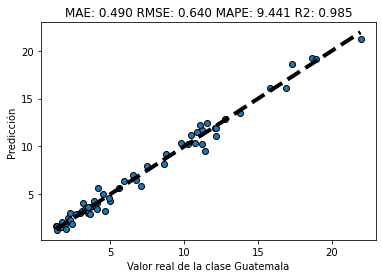

In [38]:
# Gráfica de realidad vs. predicción.
fig, ax = plt.subplots() #la llamada a la interfaz grafica
ax.scatter(objetivo, y_pred, edgecolors=(0, 0, 0))#identificacion de los ejes x, y

ax.plot([objetivo.min(),objetivo.max()], [objetivo.min(),objetivo.max()], 'k--',  lw=4) #k-- es para poner la linea de bondad punteada y el lw = 4 es el grosor de la linea

ax.set_xlabel('Valor real de la clase Guatemala')
ax.set_ylabel('Predicción')
plt.title("MAE: %.3f RMSE: %.3f MAPE: %.3f R2: %.3f" %  (MAE,RMSE,MAPE,R2)) #3f = apartir del punto 3 puntos flotantes
plt.show()

In [24]:
#la variable y_pred y objetivo se agrega al dataset export_df 
export_df['prediccion'] = y_pred
export_df['Guatemala'] = objetivo

In [25]:
#en la variable preds servira para visualizar los valores en un histograma de barras (es el cuadrito superior izquierdo del histograma )
preds = export_df[['Guatemala','prediccion']]

In [31]:
#mostrar los valores predecidos vrs los valores reales guardados en el dataset
print(export_df[['Guatemala','prediccion']].head(61))

    Guatemala  prediccion
0      1.3442    1.664374
1      1.4065    1.661828
2      1.3809    1.278098
3      1.5199    1.623234
4      1.7690    1.630302
..        ...         ...
56    16.9130   16.091568
57    17.2919   18.618947
58    18.6464   19.276437
59    21.9341   21.201215
60    18.9379   19.173307

[61 rows x 2 columns]


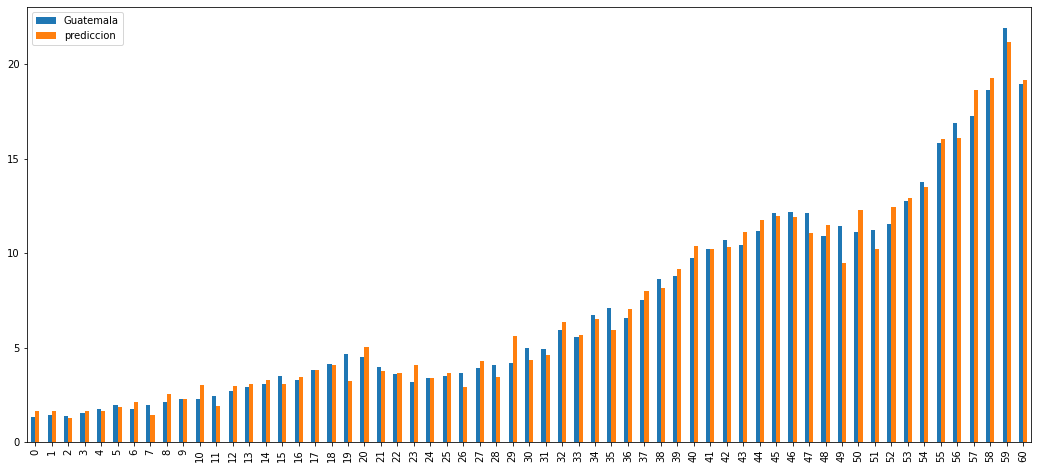

In [34]:
preds.plot(kind='bar',figsize=(18,8))#funcion para llamar el ambiente grafico del histograma
plt.grid(linewidth='2')#propiedades del ancho del rectangulo
plt.grid(linewidth='2')
plt.grid(None)#sin cuadricula
plt.show()